In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Fits of an ensemble of 2000 conformations from the GHRfl+GFP + POPC MD using different ND parameters from Abigail's SA-GRC model

Since the last GHR meeting I decided to check and test which set of ND parameters I got from Abigail are performing better to fit an ensemble of conformations coming from my GHRfl simulation. 

Fist I tried the parameters that according to Abigail were used for the current version of Fig6 of the manuscript:

## Fits from GHRfl-GFP + POPC MD (200+) structures using the ND params that were used for Fig6 of the MS (check!!) 

These are the parameters used in the first round of fitting:

| Fig6 Parameters             |
|-----------------------------|
| 1.486220 | AxisRatio        |
| 64.810100| AreaPerHeadgroup |
| 25.8     | HeightOfBelt     |
| 122      | NumberOfLipids   |
| 2        | WaterAtHeads     |
| 0        | WaterAtBelt      |
| 5        | XRoughness       |
| 1.065630 | CVBelt           |
| 0.947621 | CVLipids         |
| 1.014700 | CVMP             |
| 0.000120 | BackX            |
| 1        | ScaleX           |
| 5        | NRoughness       |
| 1        | CVWater          |
| 1        | ScaleConc        |


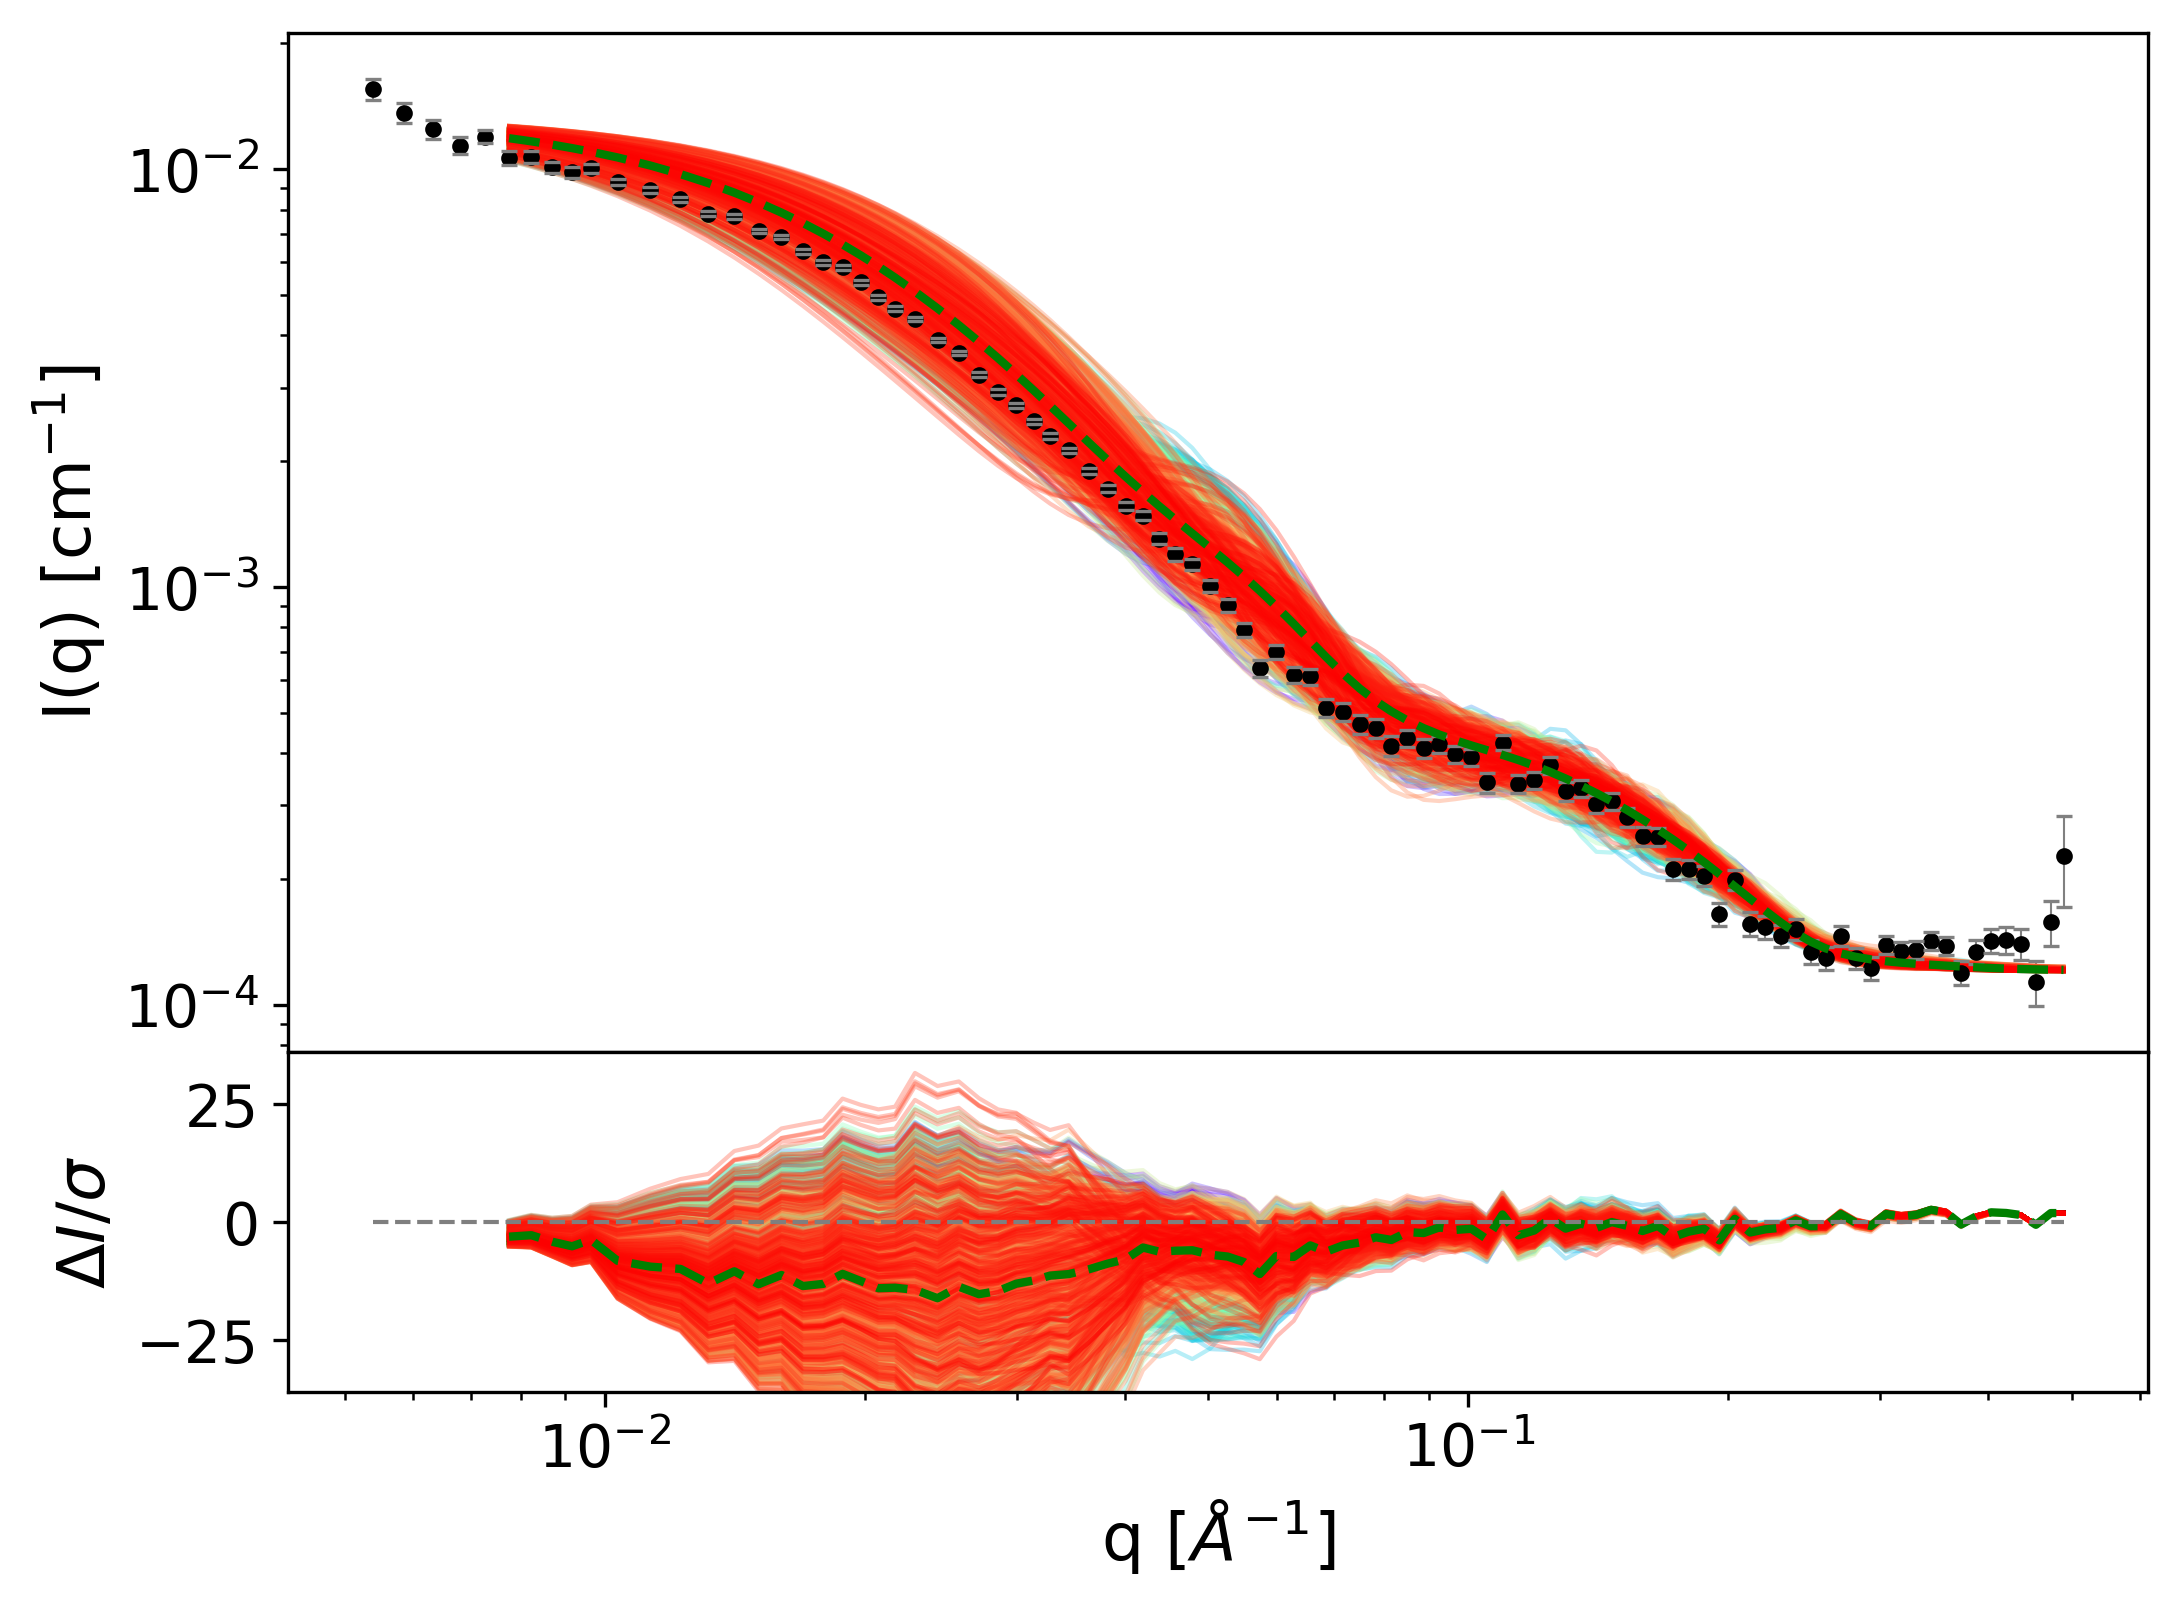

In [1]:
import os
import sys
import glob
import scandir
import matplotlib
from scandir import walk
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})


fig, (ax2, ax3) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(8, 6))
fits1 = []

#Fits
dirs1 = sorted(glob.glob('/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/**/fit1.dat', recursive=True))
#print(dirs1)
for num1, file in enumerate(dirs1):

    fits1.append(np.genfromtxt(file, skip_header=3))

num_curves1 = len(fits1)

colors1 = [cm.rainbow(k/float(num_curves1),1) for k in range(num_curves1)]
#colors1 = [cm.hsv(k/float(num_curves1),1) for k in range(num_curves1)]

mean = []
for num1, fit in enumerate(fits1):
    #if num == 0:
    ax2.loglog(fit[:,0],fit[:,1],c=colors1[num1], alpha=0.3, linewidth=1)
    mean.append(fit[:,1])
#Exp_front

mean = np.array(mean).mean(axis=0)
sts = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/GHR_NDSAXSbest.chi", skiprows=7);
sts2 = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/GHR_NDSAXSbest.chi", skiprows=12);

ax2.loglog( sts[:,0],sts[:,1], 'o',alpha=1, c='black',markersize = 3)
ax2.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')
ax2.loglog(fits1[0][:,0],mean,c='green', alpha=1, linestyle = '--', linewidth=2)

#ax2.set_xlabel( r'q [$\AA^{-1}$]' )
ax2.set_ylabel( r'I(q) [cm$^{-1}$]' )
#ax2.legend( loc = 3,  prop={'size': 8})
ax2.tick_params(axis='both', labelsize=14)
#plt.tight_layout()

#residuals plot 
ax3.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1, zorder=4 )
for num1, fit in enumerate(fits1):
    ax3.plot( fit[:,0], (sts2[:,1] - fit[:,1] ) / sts2[:,2], c=colors1[num1],alpha=0.3, linewidth=1 )

ax3.plot(fits1[0][:,0],(sts2[:,1] - mean ) / sts2[:,2],c='green', alpha=1, linestyle = '--', linewidth=2)
ax3.set_ylim((-36,36))
ax3.set_ylabel( r'$\Delta I/\sigma$' )
ax3.set_xlabel( r'q [$\AA^{-1}$]' )
ax3.tick_params(axis='both', labelsize=14)

plt.savefig('GHRfl_GFP_ensemble_fit_WIF_fixedparams.pdf', format = 'pdf')
plt.show()





# Plot of averages only ##

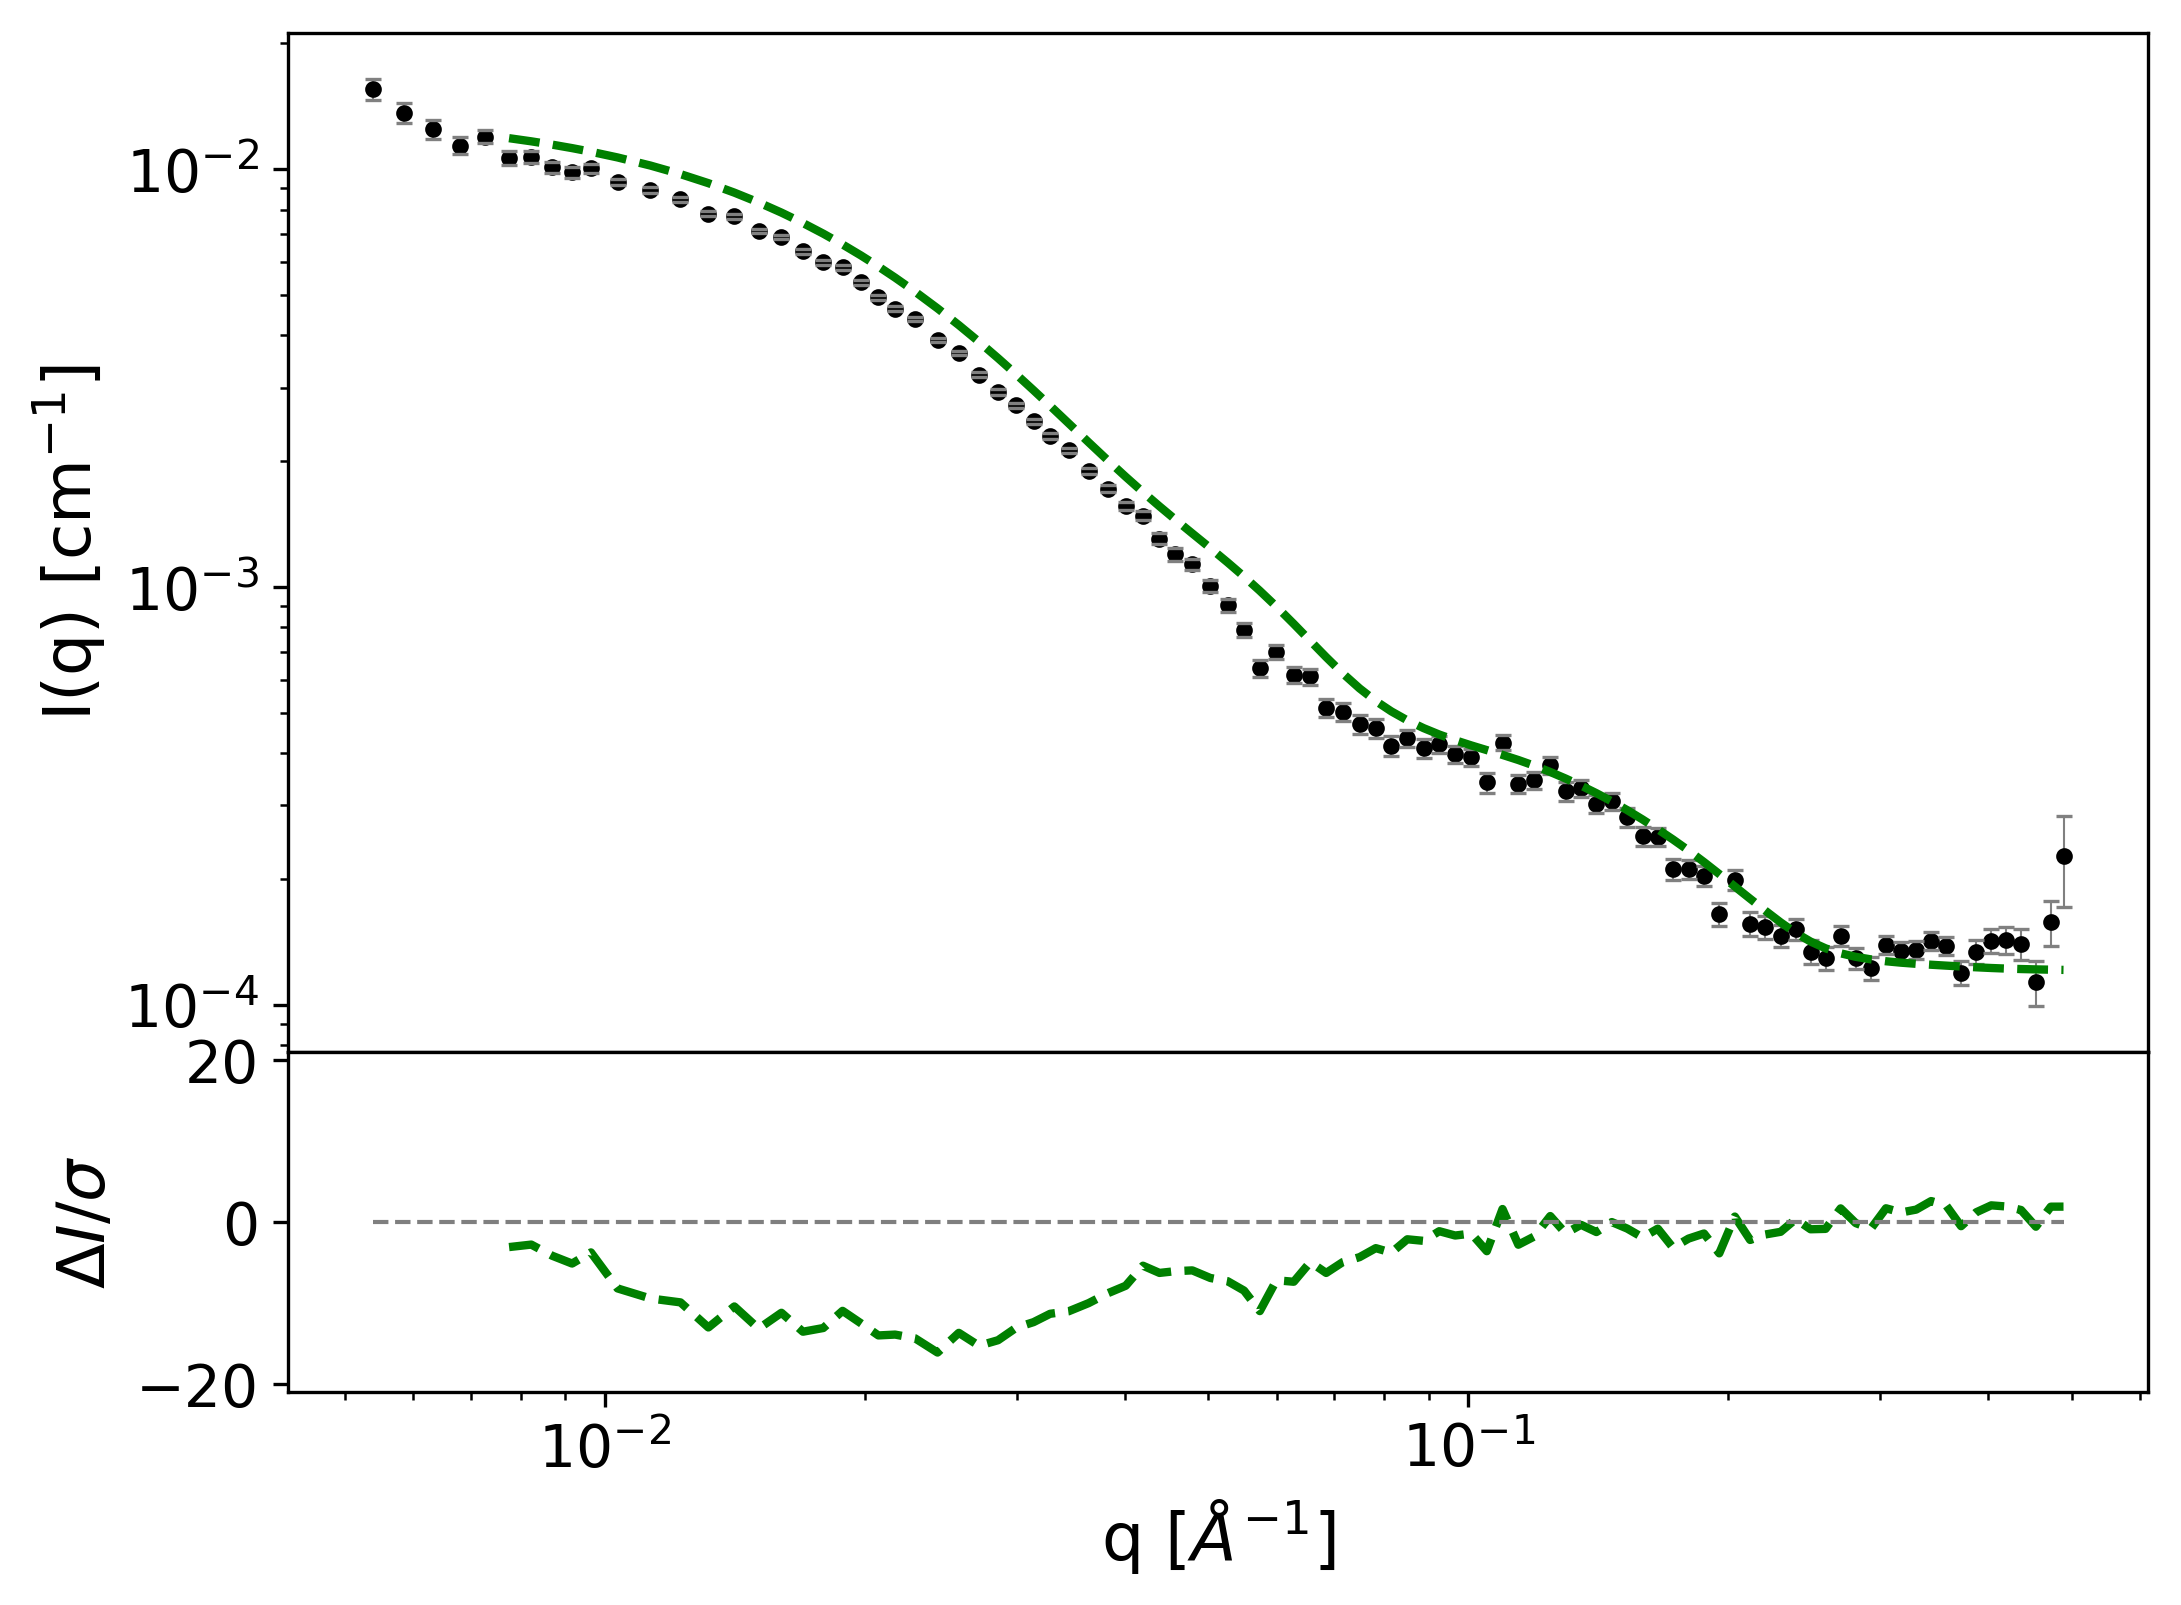

In [2]:
fig, (ax2, ax3) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(8, 6))

ax2.loglog( sts[:,0],sts[:,1], 'o',alpha=1, c='black',markersize = 3)
ax2.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')
ax2.loglog(fits1[0][:,0],mean,c='green', alpha=1, linestyle = '--', linewidth=2)
ax2.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax2.tick_params(axis='both', labelsize=14)

ax3.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1, zorder=4 )
ax3.plot(fits1[0][:,0],(sts2[:,1] - mean ) / sts2[:,2],c='green', alpha=1, linestyle = '--', linewidth=2)
ax3.set_ylim((-21,21))
ax3.set_ylabel( r'$\Delta I/\sigma$' )
ax3.set_xlabel( r'q [$\AA^{-1}$]' )
ax3.tick_params(axis='both', labelsize=14)

#plt.savefig('GHRfl_GFP_ensemble_fit_WIF_fixedparams.pdf', format = 'pdf')
plt.show()

## Chi2 histogram of fits from above

88.5951442878


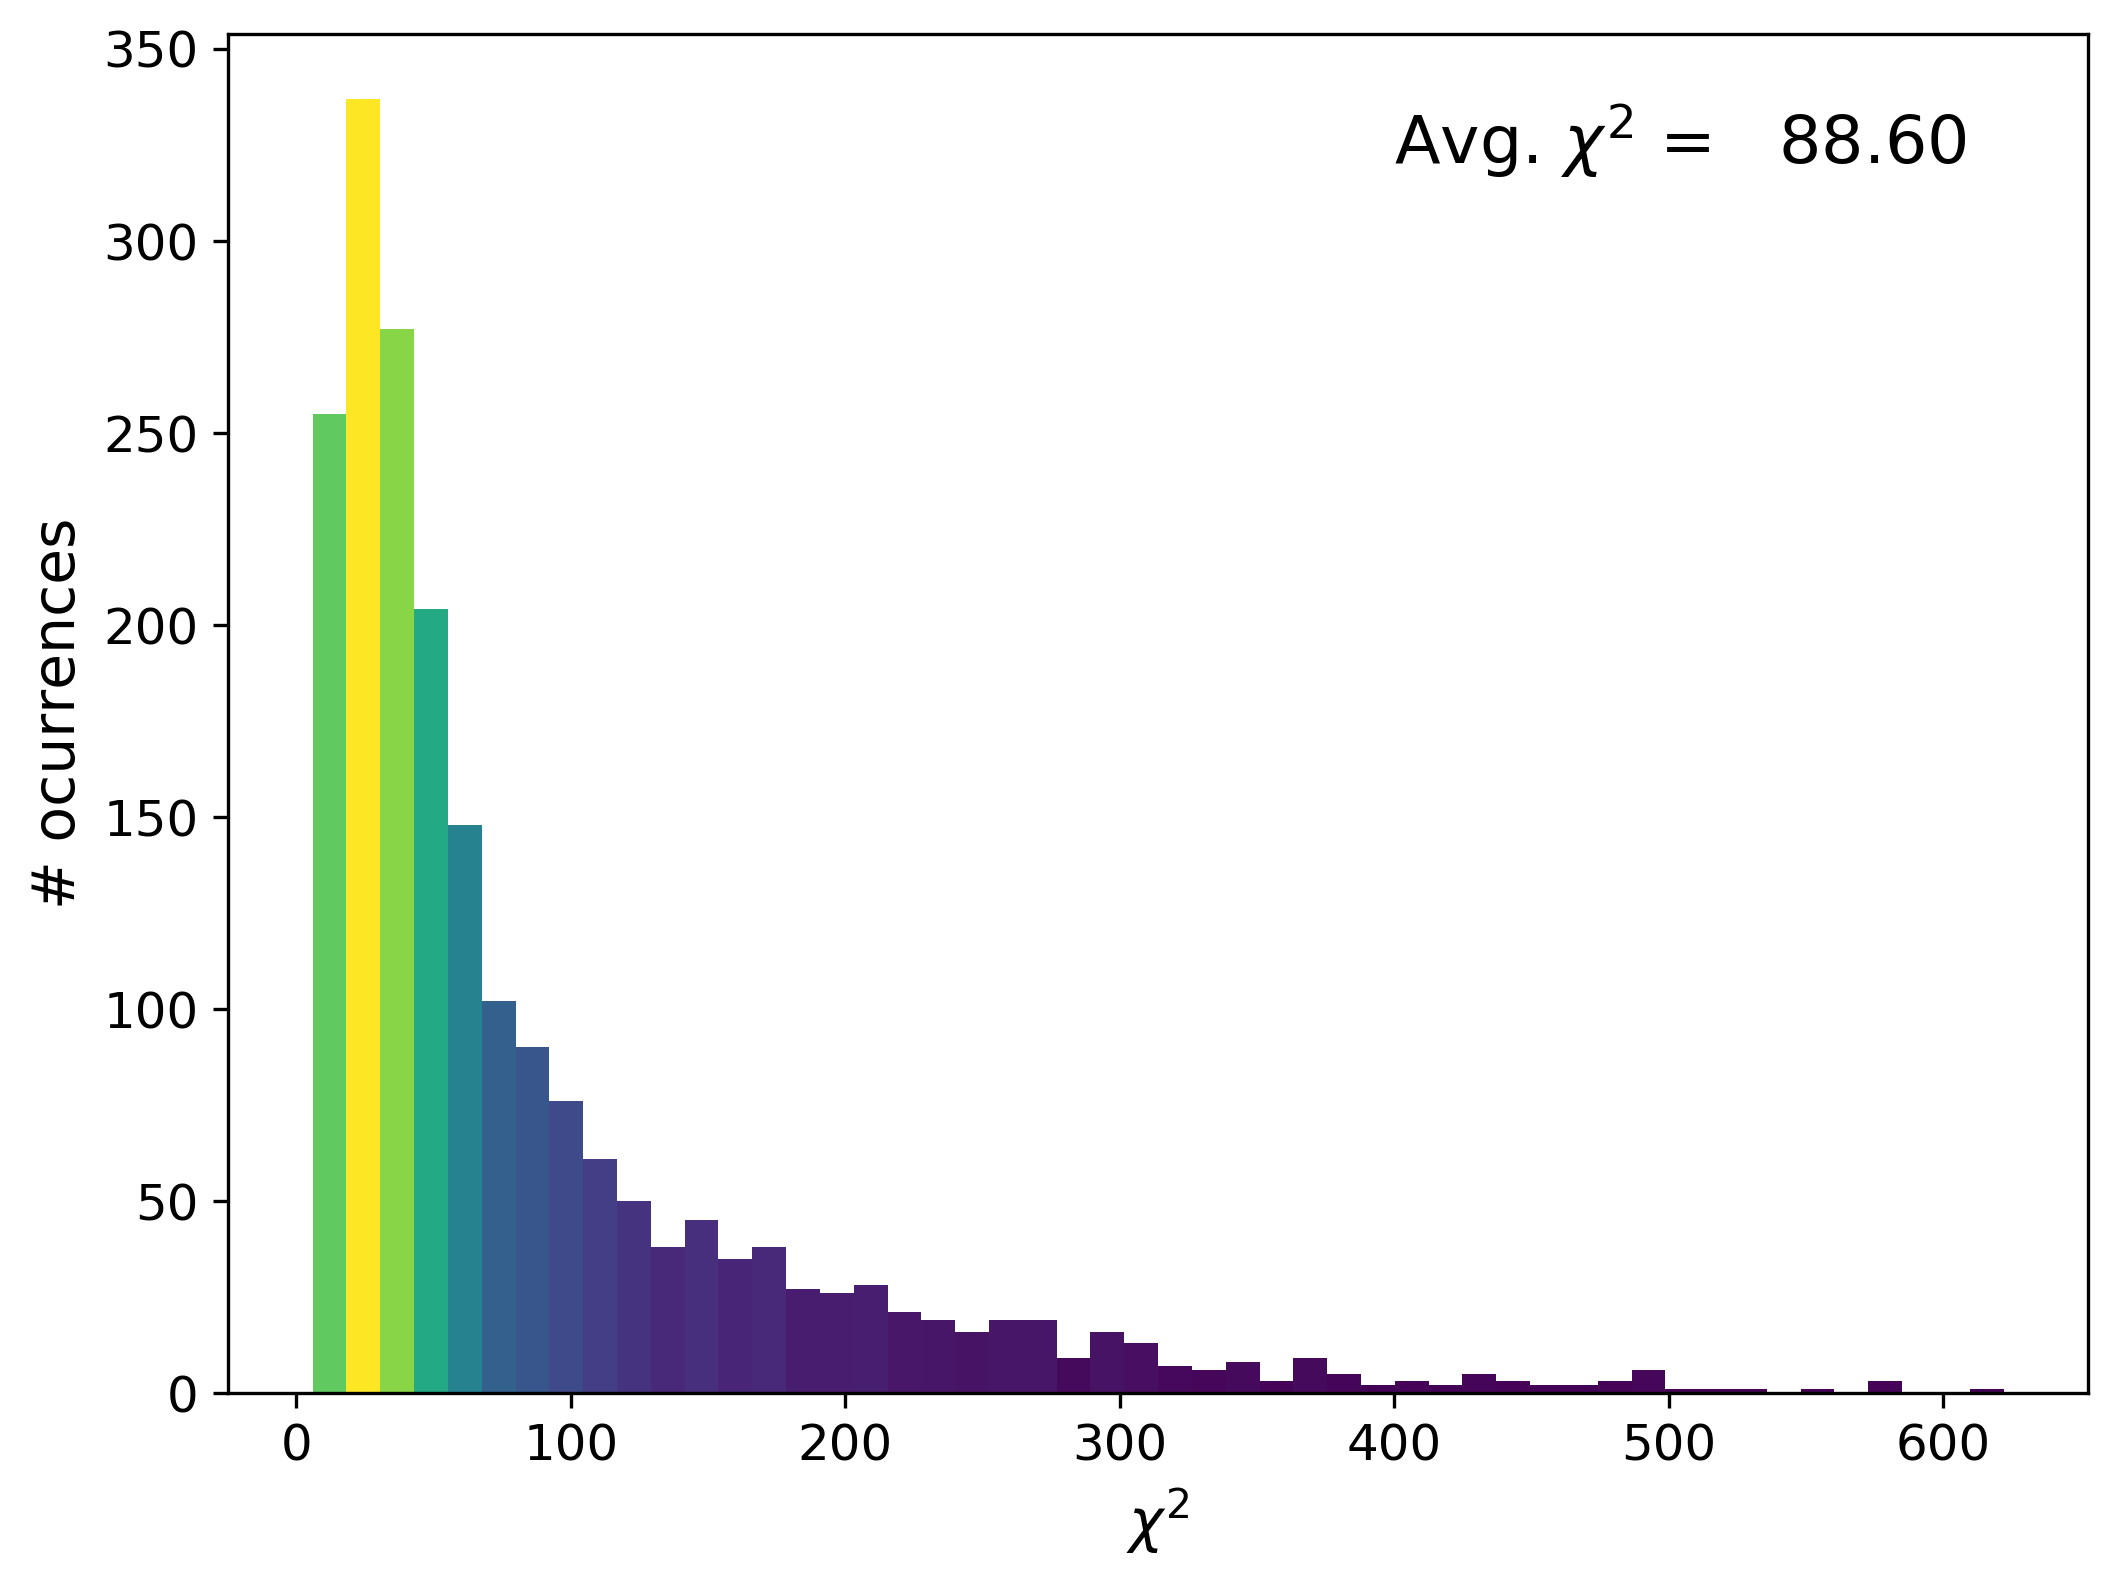

In [27]:
### Chi² of the models --- histogram ###

#sns.set_style("white")
#sns.set_context("paper")
#sns.set_style("ticks")
#mpl.rcParams['figure.dpi'] =300

fig, (ax4) = plt.subplots(figsize=(8, 6))

### Chi² of the models --- Histogram ###
models = np.loadtxt('/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/Chi2_summary.txt')

avg = np.mean(models)
print (avg)
n_models = len (models)
n_binsm = 30
binm_size = n_models//n_binsm
binsm = np.arange(0,n_models+binm_size,binm_size)

#fracs = models / models.max()
#norm = mpl.colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly

#ax4.hist(models, bins=50)
N, bins, patches = ax4.hist(models, bins=50)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = mpl.colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax4.set_ylabel("# ocurrences",fontsize=14)
ax4.set_xlabel(r"$\chi^2$",fontsize=14)
ax4.tick_params(axis='both', labelsize=12)
#ax4.legend( loc = 1,  prop={'size': 8},frameon=False)
ax4.annotate("Avg. $\chi^2$ ={:8.2f}".format(avg), xy=(400,320),xycoords='data',
             fontsize=16)
starty, end = ax4.get_ylim()
startx, end = ax4.get_xlim()

#plt.savefig('GHR_ICD_fit_fixed_chi2hist', format = 'pdf')
plt.show()

### BME of fits from structures using the ND used for Fig6 of the MS

# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.203644=1.9900e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.330304=1.3500e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.403559=1.4200e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.473033=1.5800e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.489338=2.2700e-04 is larger than maximum value in simulation 1.0000e-04
# theta: 5.0
# theta: 10.0
# theta: 20.0
# theta: 40.0
# theta: 60.0
# theta: 80.0
# theta: 100.0
# theta: 120.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0


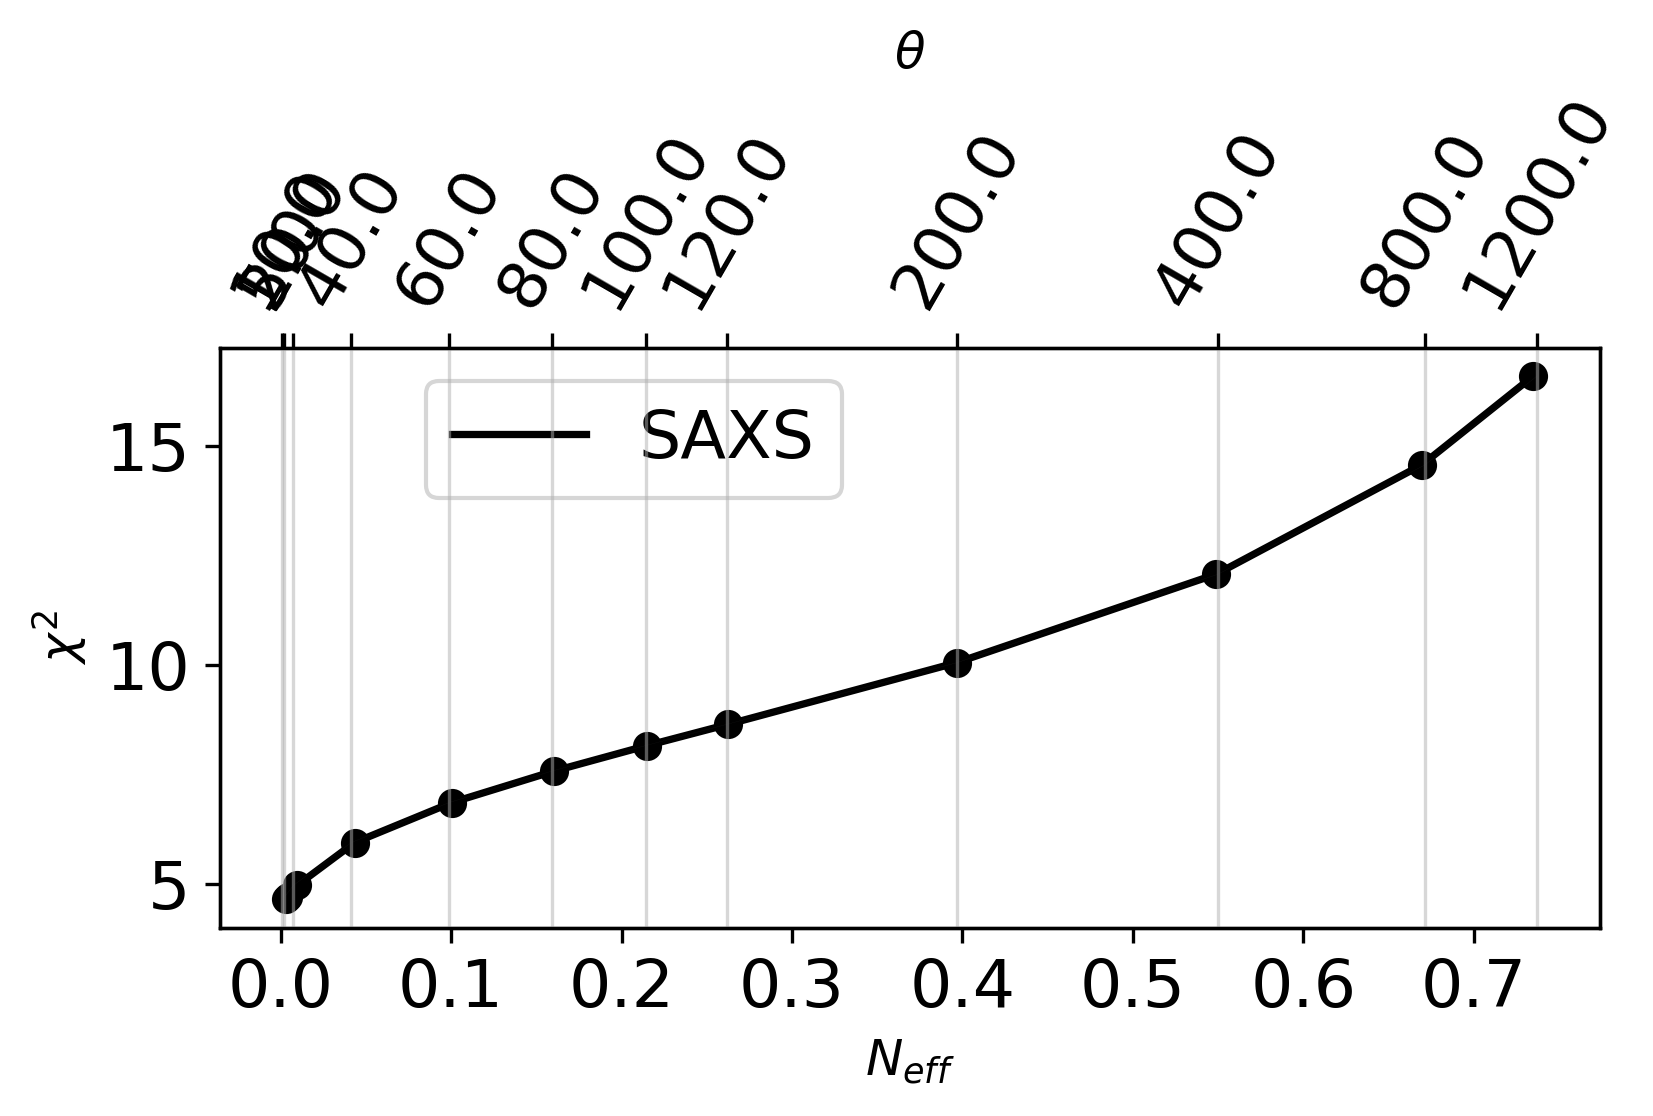

In [54]:
## First part. BME and eval different thetas

bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/GHRflGFP_m3pws10_Rg.dat')
#print(Rg)
RgExp =68.76
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/EXP.dat'
calc_saxs = '/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/sim.dat'

### initialize reweighting class

rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
#w0 =np.loadtxt('pws10_weights.dat')
#rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [5.,10.,20.,40.,60.,80.,100.,120.,200.,400.,800.,1200.]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])

    ### Plot figure for different values of theta vs Neff and chi^2

results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [5,10,20,40,60,80,100,120,200,400,800,1200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=12)
ax2.set_xlabel(r"$\theta$",fontsize=12)
ax1.set_ylabel(r"$\chi^2$",fontsize=12)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
#plt.savefig('GHRglGfp_pws10_NDmodel_Theta_Neff_q05.pdf', format = 'pdf')
plt.show()

# theta: 120
# CHI2_re before minimization:      80.0424
# CHI2_re after minimization:        9.8636
# Fraction of effective frames:      0.2332
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.203644=1.9900e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.212151=1.5600e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.330304=1.3500e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.403559=1.4200e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.473033=1.5800e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.489338=2.2700e-04 is larger than maximum value in simulation 1.0000e-04
# theta: 120
# Warning: expt average             0.195373=1.6500e-04 is smaller th

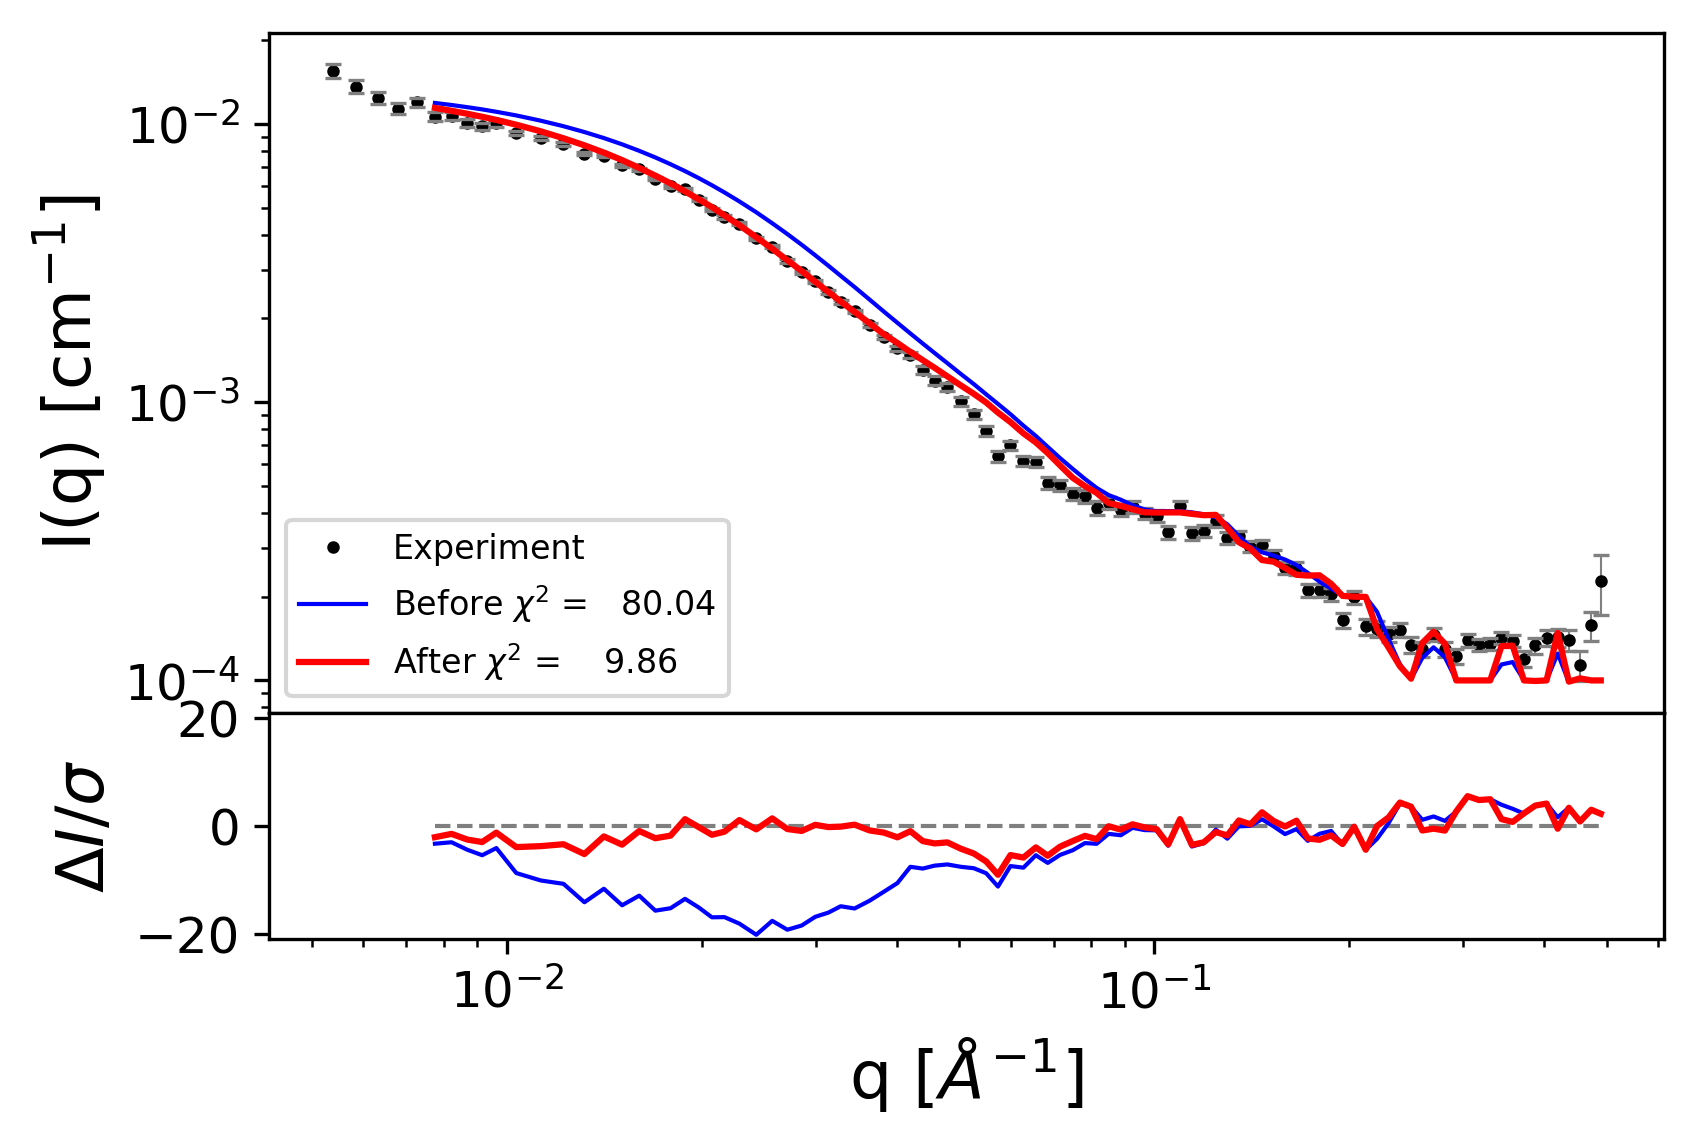

In [57]:
#Second part BME -- Rew. using selected theta and pltot comparative SAXS profiles. Using 4 bins 

# select theta=120
chi2_before,chi2_after, srel = rew.optimize(theta=120)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

##### Block averaging and plot figure

### Set bins for block average and optimal theta to use
n_frames = len(Rg)
n_bins =4
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=120
### split in 5 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/example2_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("example2_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

sts = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/example2_2_.stats.dat");
exp = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/BME/GHR_NDSAXSbest_original.chi")

fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True,
                             gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(6, 4))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1,label="Experiment", c='black',markersize = 2)

ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Before $\chi^2$ ={:8.2f}".format(chi2_before),c='blue', linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="After $\chi^2$ ={:8.2f}".format(chi2_after),c='red',linewidth = 1.5, zorder = 5)


ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c='blue', linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c='red', linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-21,21))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)
#ax1.legend(loc = 1, prop={'size': 14})
#ax0.set_ylabel
#ax0.legend()
plt.show()

### Fits from GHRfl-GFP + POPC MD (2000+) structures using AB's "Best" ND params

I repeated the fitting and BME process with another set of parameters provided by AB after the latest revision of the MS before Noah's defense:

| Best AB's parameters |
|-----------------------------|
|  1.4     | AxisRatio |
|  65      | AreaPerHeadgroup |
|  25.8    | HeightOfBelt |
|  120     | NumberOfLipids |
|  5       | WaterAtHeads |
|  0       | WaterAtBelt |
|  6.21378 | XRoughness |
|  1.02844 | CVBelt |
|  0.981301| CVLipids |
|  1.06076 | CVMP |
|  0.00012 | BackX |
|  1.19804 | ScaleX |
|  5       | NRoughness |
|  1       | CVWater |
|  1       | ScaleConc |


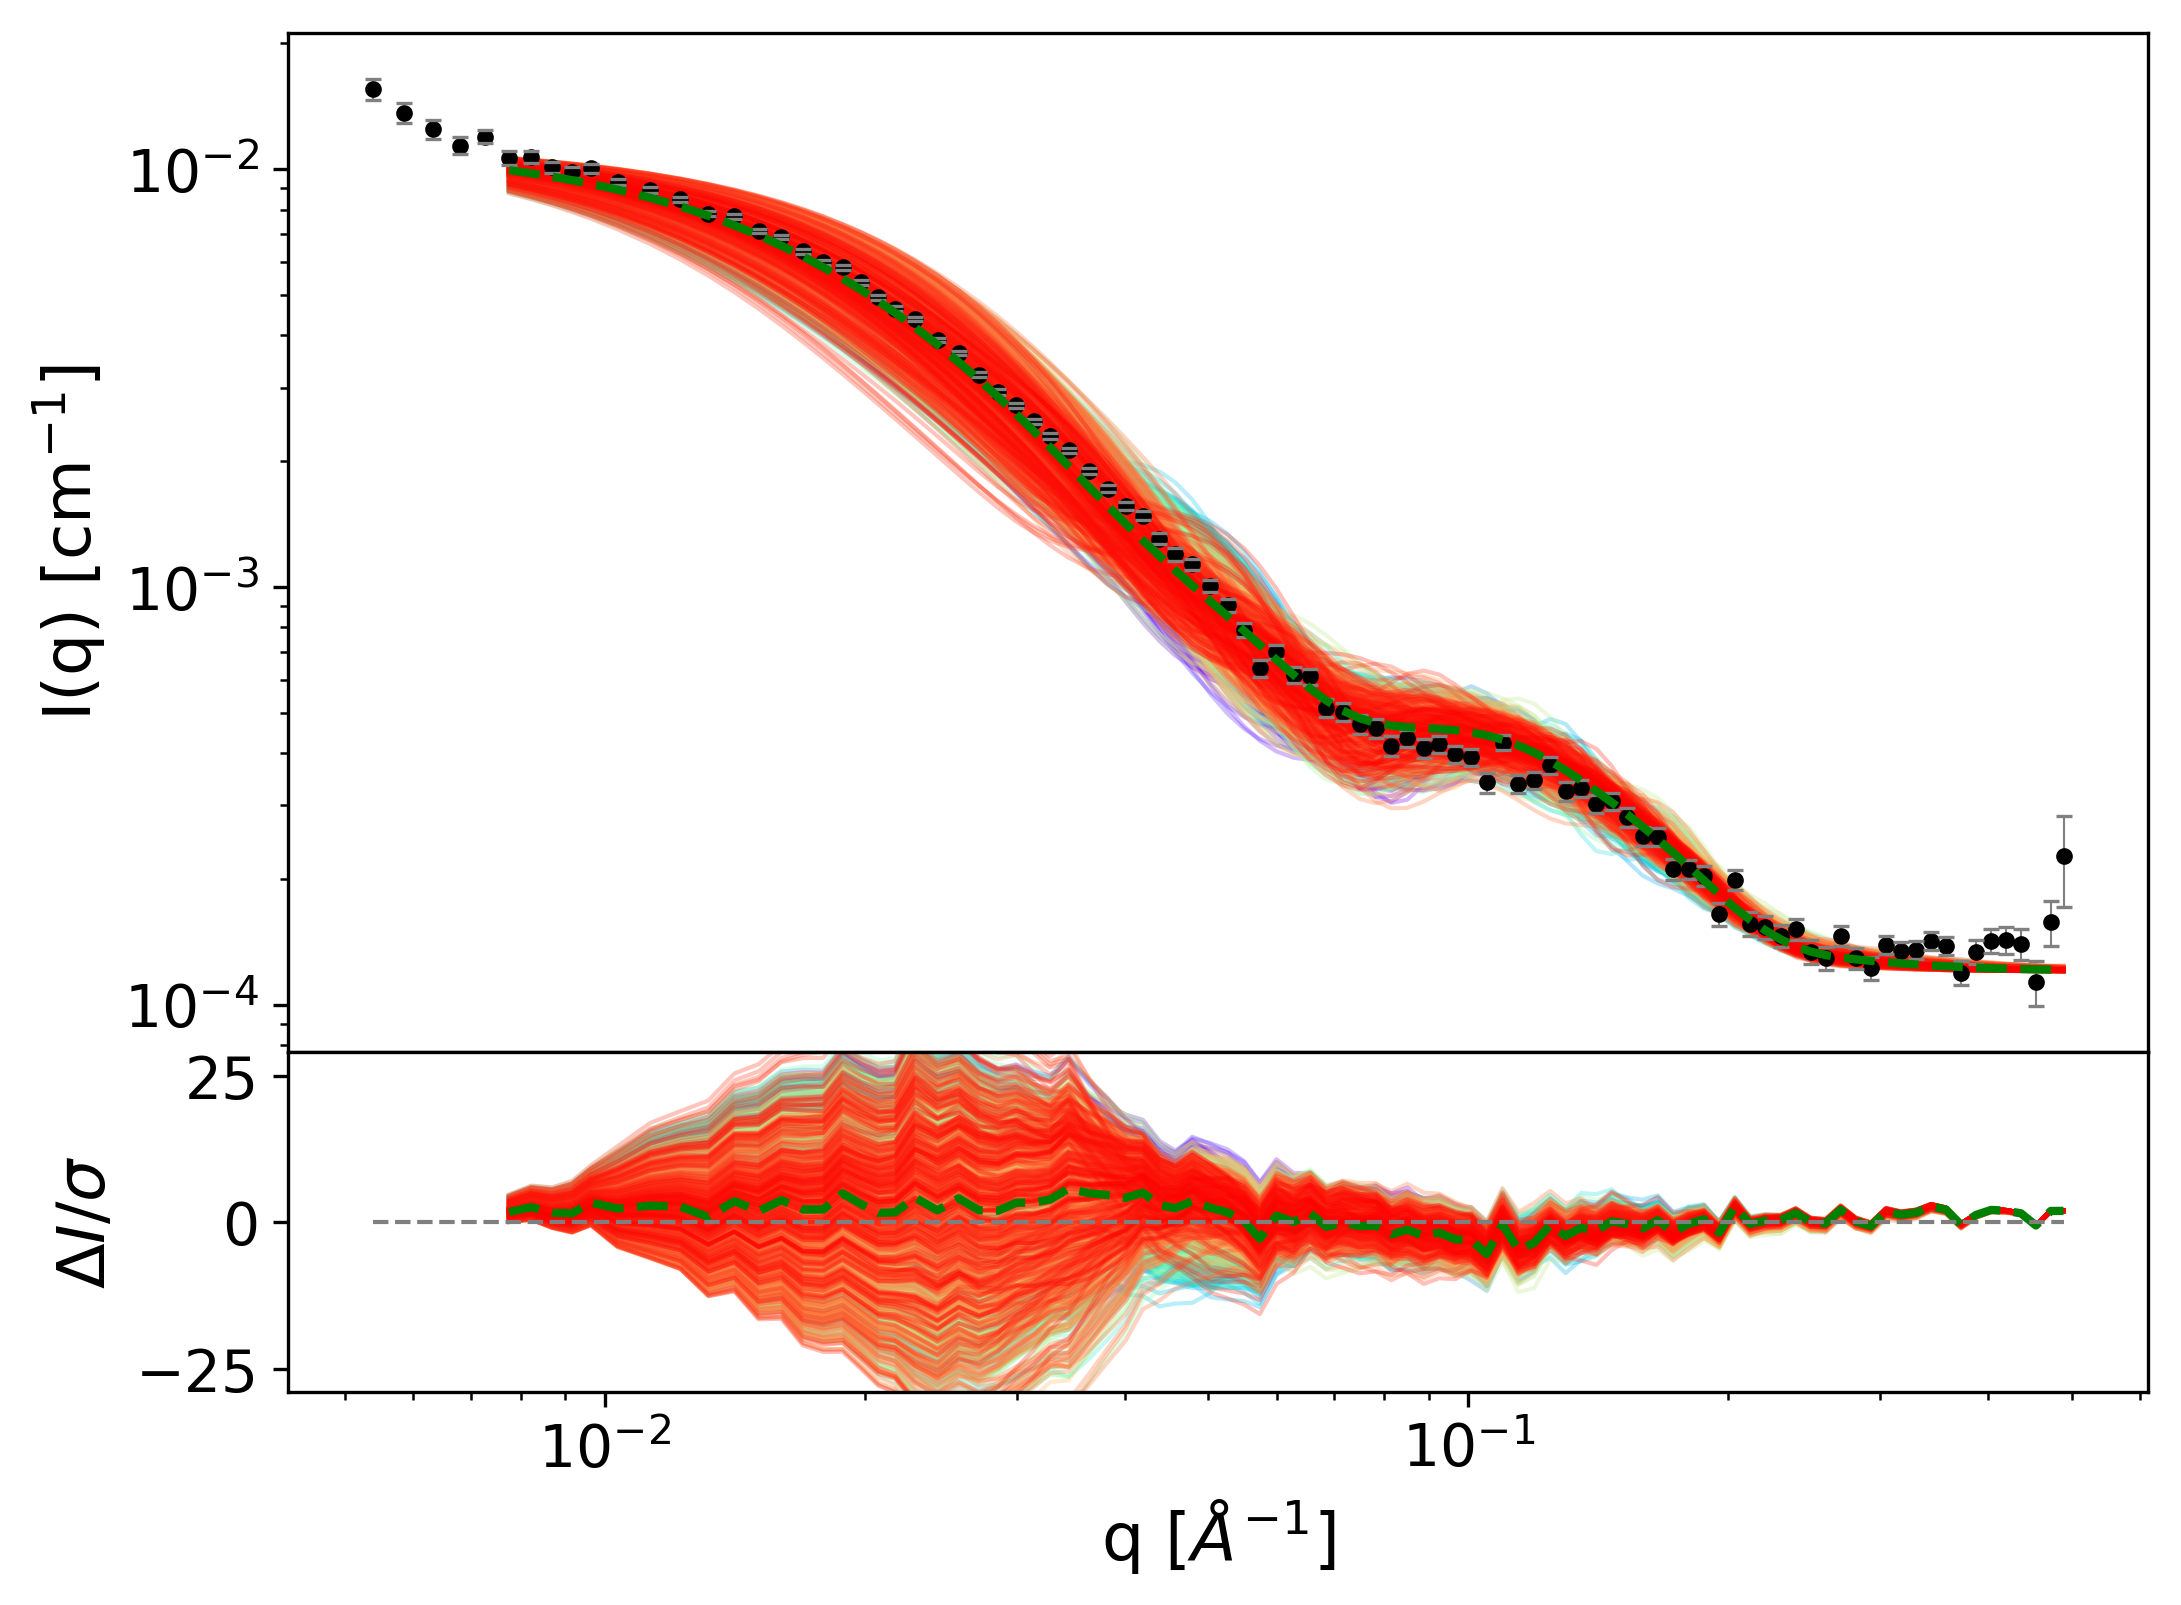

In [50]:
##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})


fig, (ax2, ax3) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(8, 6))
fits1 = []

#Fits
dirs1 = sorted(glob.glob('/home/raul/projects/GHR_ensemble_fit/WIFBatch4/Test2000_start_q0075/**/fit1.dat', recursive=True))
#print(dirs1)
for num1, file in enumerate(dirs1):

    fits1.append(np.genfromtxt(file, skip_header=3))

num_curves1 = len(fits1)

colors1 = [cm.rainbow(k/float(num_curves1),1) for k in range(num_curves1)]
#colors1 = [cm.hsv(k/float(num_curves1),1) for k in range(num_curves1)]

mean = []
for num1, fit in enumerate(fits1):
    #if num == 0:
    ax2.loglog(fit[:,0],fit[:,1],c=colors1[num1], alpha=0.3, linewidth=1)
    mean.append(fit[:,1])
#Exp_front

mean2 = np.array(mean).mean(axis=0)
sts = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/GHR_NDSAXSbest.chi", skiprows=7);
sts2 = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch_fig5params/Data/GHR_NDSAXSbest.chi", skiprows=12);

ax2.loglog( sts[:,0],sts[:,1], 'o',alpha=1, c='black',markersize = 3)
ax2.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')
ax2.loglog(fits1[0][:,0],mean2,c='green', alpha=1, linestyle = '--', linewidth=2)

#ax2.set_xlabel( r'q [$\AA^{-1}$]' )
ax2.set_ylabel( r'I(q) [cm$^{-1}$]' )
#ax2.legend( loc = 3,  prop={'size': 8})
ax2.tick_params(axis='both', labelsize=14)
#plt.tight_layout()

#residuals plot 
ax3.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1, zorder=4 )
for num1, fit in enumerate(fits1):
    ax3.plot( fit[:,0], ( sts2[:,1] - fit[:,1]) / sts2[:,2], c=colors1[num1],alpha=0.3, linewidth=1 )

ax3.plot(fits1[0][:,0],(sts2[:,1] - mean2) / sts2[:,2],c='green', alpha=1, linestyle = '--', linewidth=2)
ax3.set_ylim((-29,29))
ax3.set_ylabel( r'$\Delta I/\sigma$' )
ax3.set_xlabel( r'q [$\AA^{-1}$]' )
ax3.tick_params(axis='both', labelsize=14)

#plt.savefig('GHRfl_GFP_ensemble_fit_WIF_fixedparams.pdf', format = 'pdf')
plt.show()



## Average only

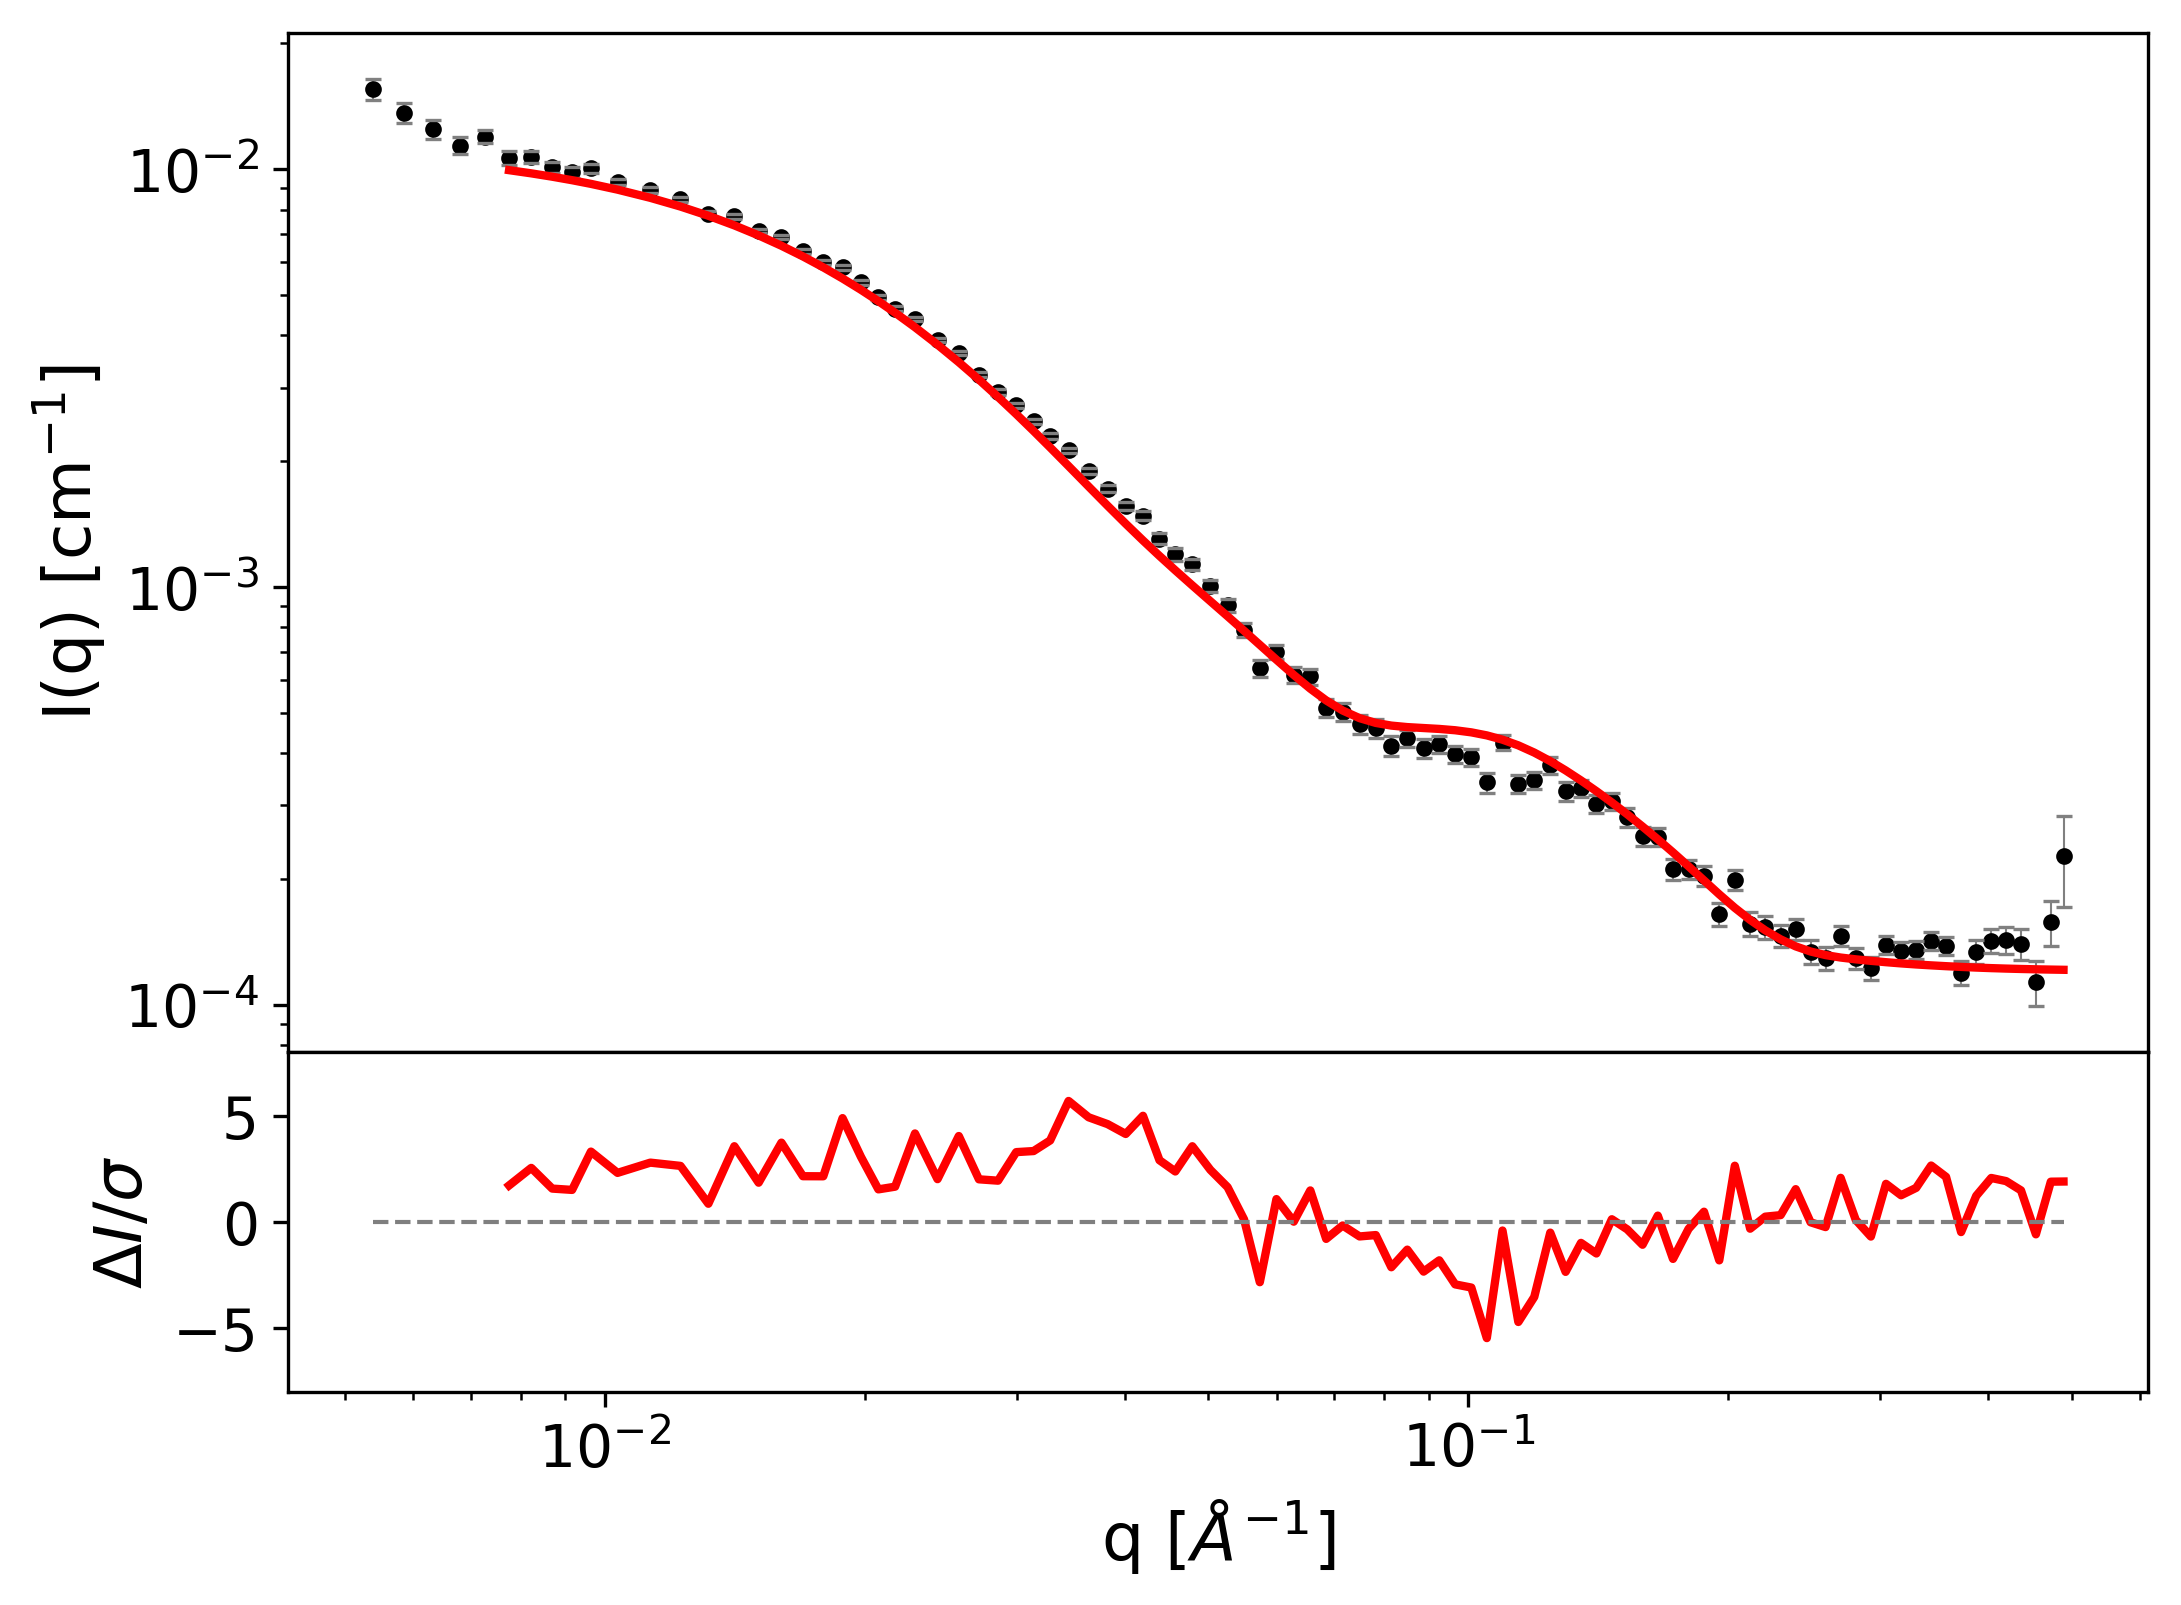

In [53]:
fig, (ax2, ax3) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(8, 6))

ax2.loglog( sts[:,0],sts[:,1], 'o',alpha=1, c='black',markersize = 3)
ax2.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')

ax2.loglog(fits1[0][:,0],mean2,c='red', alpha=1, linewidth=2)


ax2.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax2.tick_params(axis='both', labelsize=14)

ax3.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1, zorder=4 )
ax3.plot(fits1[0][:,0],(sts2[:,1] - mean2) / sts2[:,2],c='red', alpha=1, linewidth=2)
ax3.set_ylim((-8,8))
ax3.set_ylabel( r'$\Delta I/\sigma$' )
ax3.set_xlabel( r'q [$\AA^{-1}$]' )
ax3.tick_params(axis='both', labelsize=14)

#plt.savefig('GHRfl_GFP_ensemble_fit_WIF_fixedparams.pdf', format = 'pdf')
plt.show()

## Chi2 histogram from above fits

34.6472755382


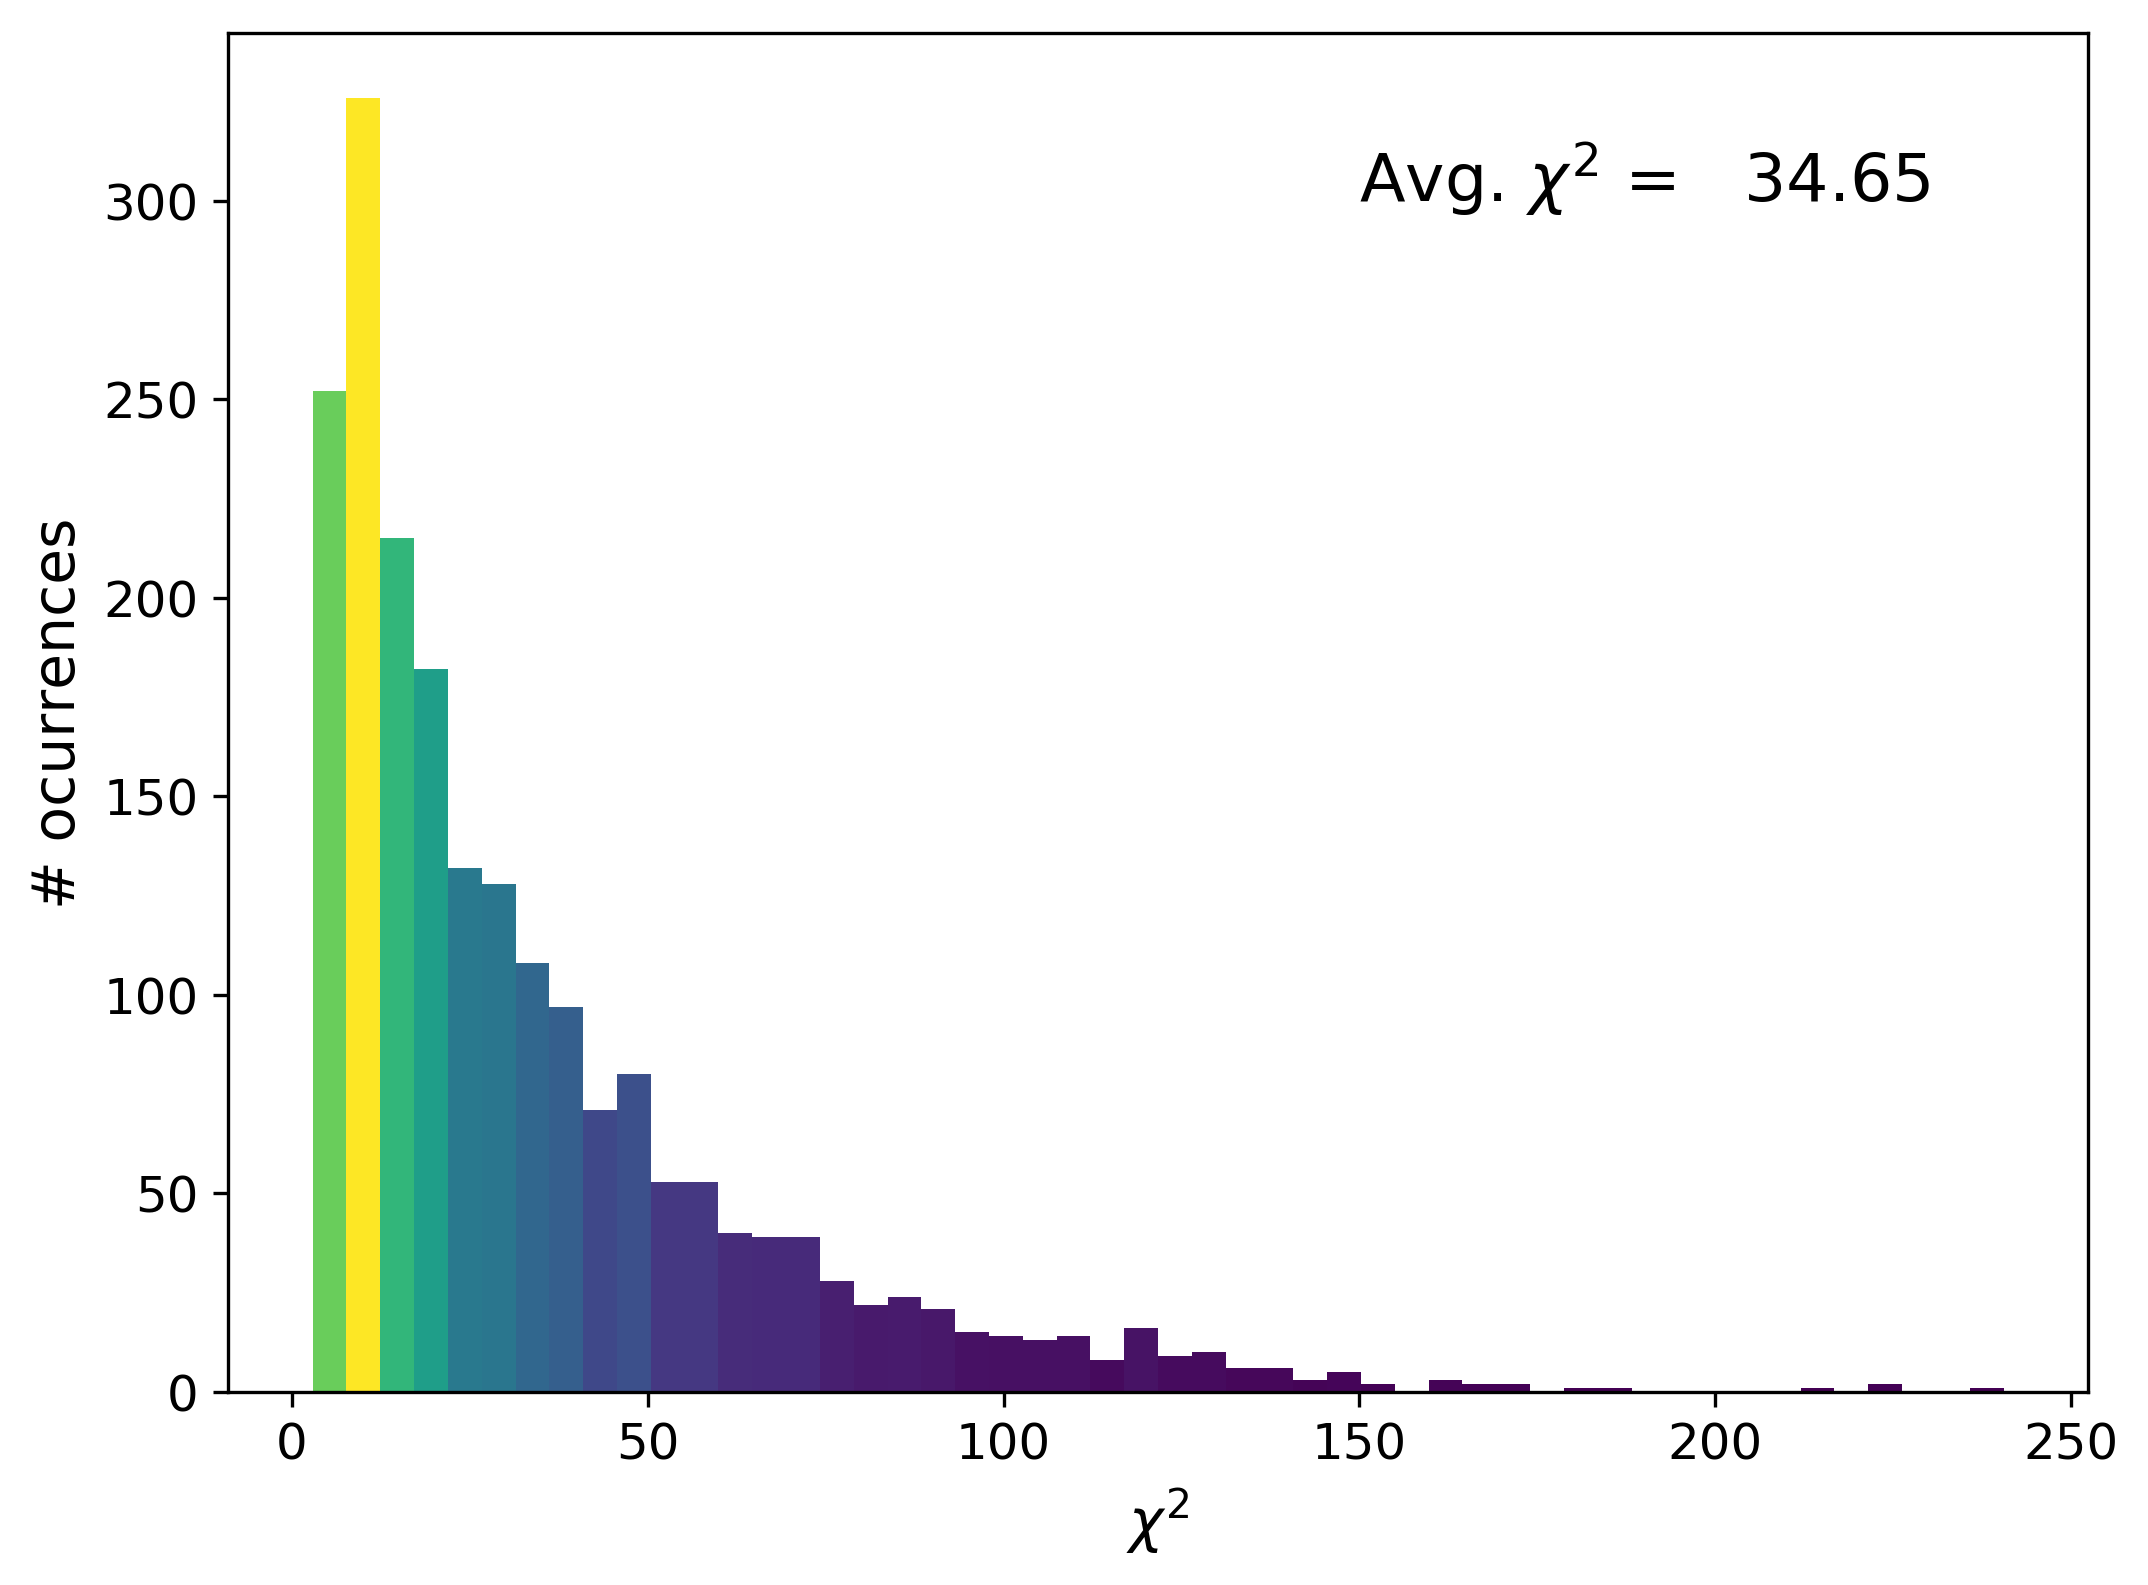

In [31]:
### Chi² of the models --- histogram ###

#sns.set_style("white")
#sns.set_context("paper")
#sns.set_style("ticks")
#mpl.rcParams['figure.dpi'] =300

fig, (ax4) = plt.subplots(figsize=(8, 6))

### Chi² of the models --- Histogram ###
models = np.loadtxt('/home/raul/projects/GHR_ensemble_fit/WIFBatch4/Test2000_start_q0075/Chi2_summary.txt')
avg= np.mean(models)
print (avg)
n_models = len (models)
n_binsm = 30
binm_size = n_models//n_binsm
binsm = np.arange(0,n_models+binm_size,binm_size)

#fracs = models / models.max()
#norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly

ax4.hist(models, bins=50)
N, bins, patches = ax4.hist(models, bins=50)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = mpl.colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax4.set_ylabel("# ocurrences",fontsize=14)
ax4.set_xlabel(r"$\chi^2$",fontsize=14)
ax4.tick_params(axis='both', labelsize=12)
ax4.annotate("Avg. $\chi^2$ ={:8.2f}".format(avg), xy=(150,300),xycoords='data',
             fontsize=16)
starty, end = ax4.get_ylim()
startx, end = ax4.get_xlim()

#plt.savefig('GHR_ICD_fit_fixed_chi2hist', format = 'pdf')
plt.show()

### BME from fits of GHRfl-GFP + POPC MD (2000+) structures using AB's "Best" ND params

# Warning: expt average             0.007746=1.0622e-02 is larger than maximum value in simulation 1.0600e-02
# Warning: expt average             0.008219=1.0665e-02 is larger than maximum value in simulation 1.0500e-02
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.203644=1.9900e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.249251=1.3400e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.292731=1.2200e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.330304=1.3500e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.372366=1.1900e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.403559=1.4200e-04 is larger than maximum value in simulation 1.0000e-04
# Warnin

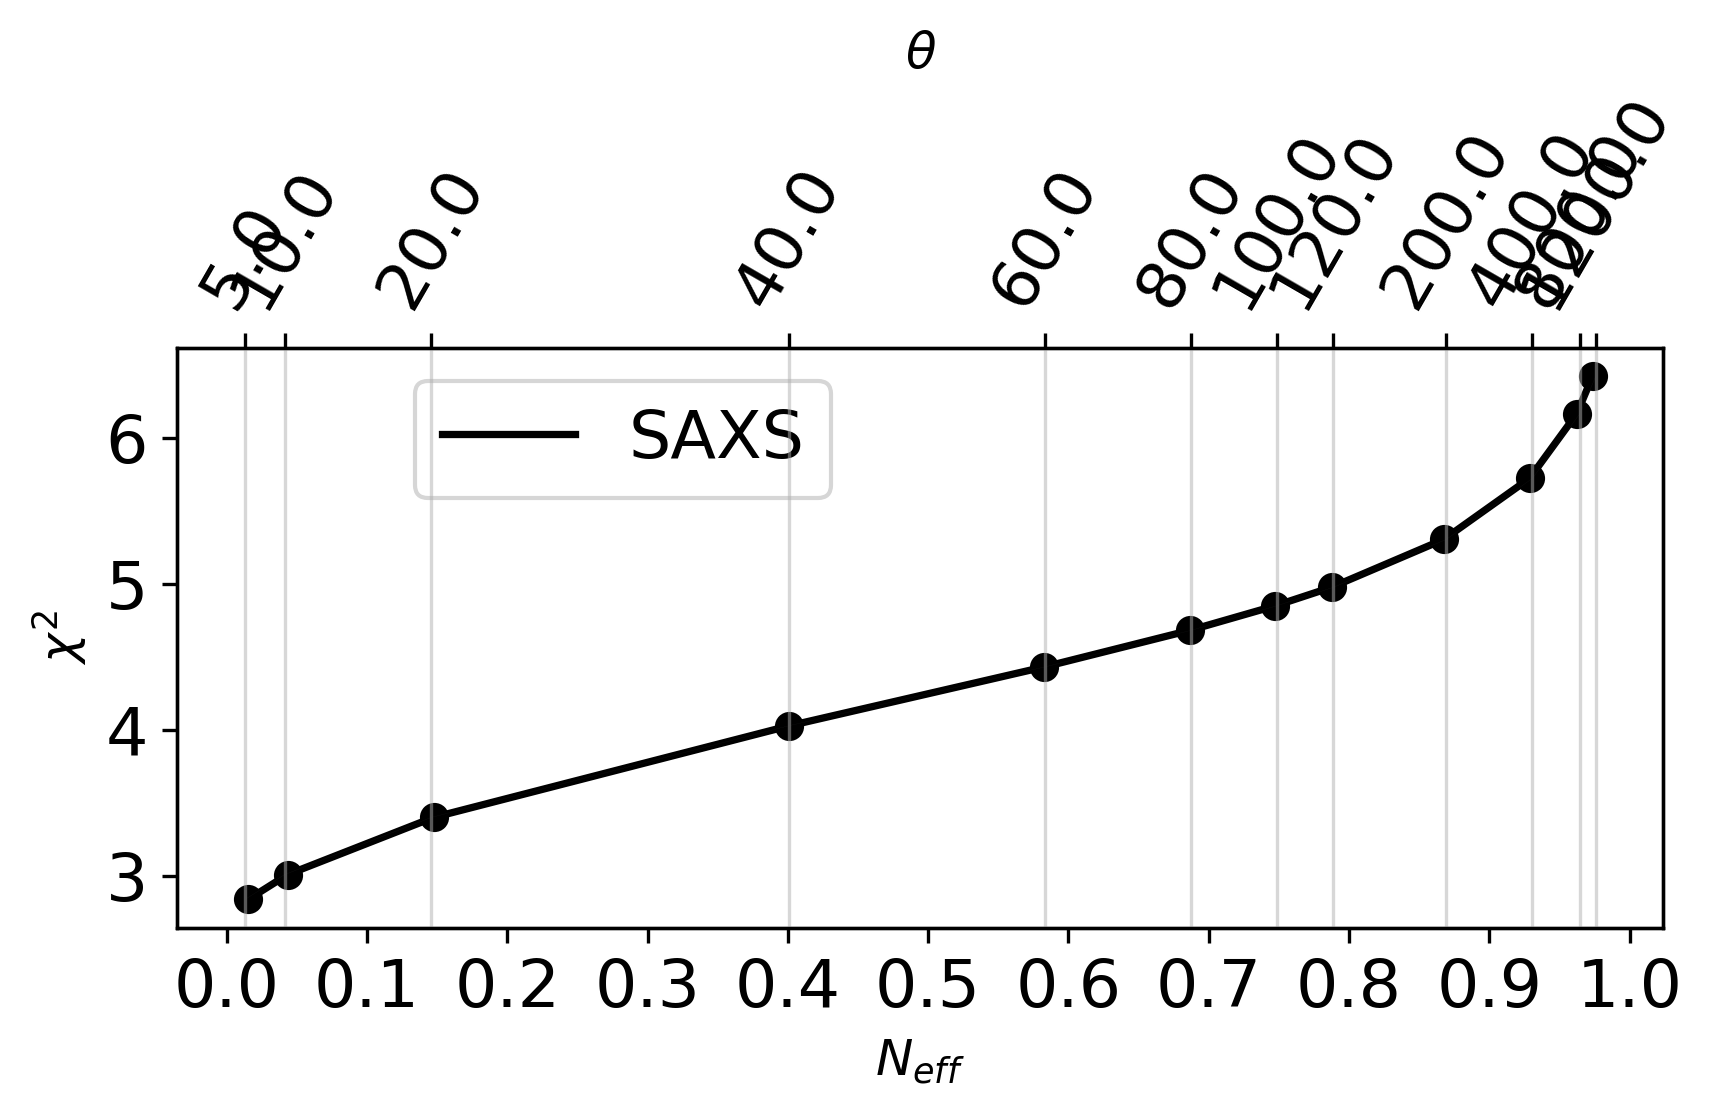

In [37]:
## First part. BME and eval different thetas

bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/GHRflGFP_m3pws10_Rg.dat')
#print(Rg)
RgExp =68.76
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/EXP.dat'
calc_saxs = '/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/sim.dat'

### initialize reweighting class

rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
#w0 =np.loadtxt('pws10_weights.dat')
#rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [5.,10.,20.,40.,60.,80.,100.,120.,200.,400.,800.,1200.]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])

    ### Plot figure for different values of theta vs Neff and chi^2

results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [5,10,20,40,60,80,100,120,200,400,800,1200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=12)
ax2.set_xlabel(r"$\theta$",fontsize=12)
ax1.set_ylabel(r"$\chi^2$",fontsize=12)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
#plt.savefig('GHRglGfp_pws10_NDmodel_Theta_Neff_q05.pdf', format = 'pdf')
plt.show()


# theta: 120
# CHI2_re before minimization:       7.9214
# CHI2_re after minimization:        5.3940
# Fraction of effective frames:      0.7151
# Warning: expt average             0.007746=1.0622e-02 is larger than maximum value in simulation 1.0600e-02
# Warning: expt average             0.008219=1.0665e-02 is larger than maximum value in simulation 1.0500e-02
# Warning: expt average             0.105104=3.4100e-04 is smaller than minimum value in simulation 4.0000e-04
# Warning: expt average             0.187575=2.0400e-04 is larger than maximum value in simulation 2.0000e-04
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.203644=1.9900e-04 is smaller than minimum value in simulation 2.0000e-04
# Warning: expt average             0.249251=1.3400e-04 is larger than maximum value in simulation 1.0000e-04
# Warning: expt average             0.292731=1.2200e-04 is larger than maximum val

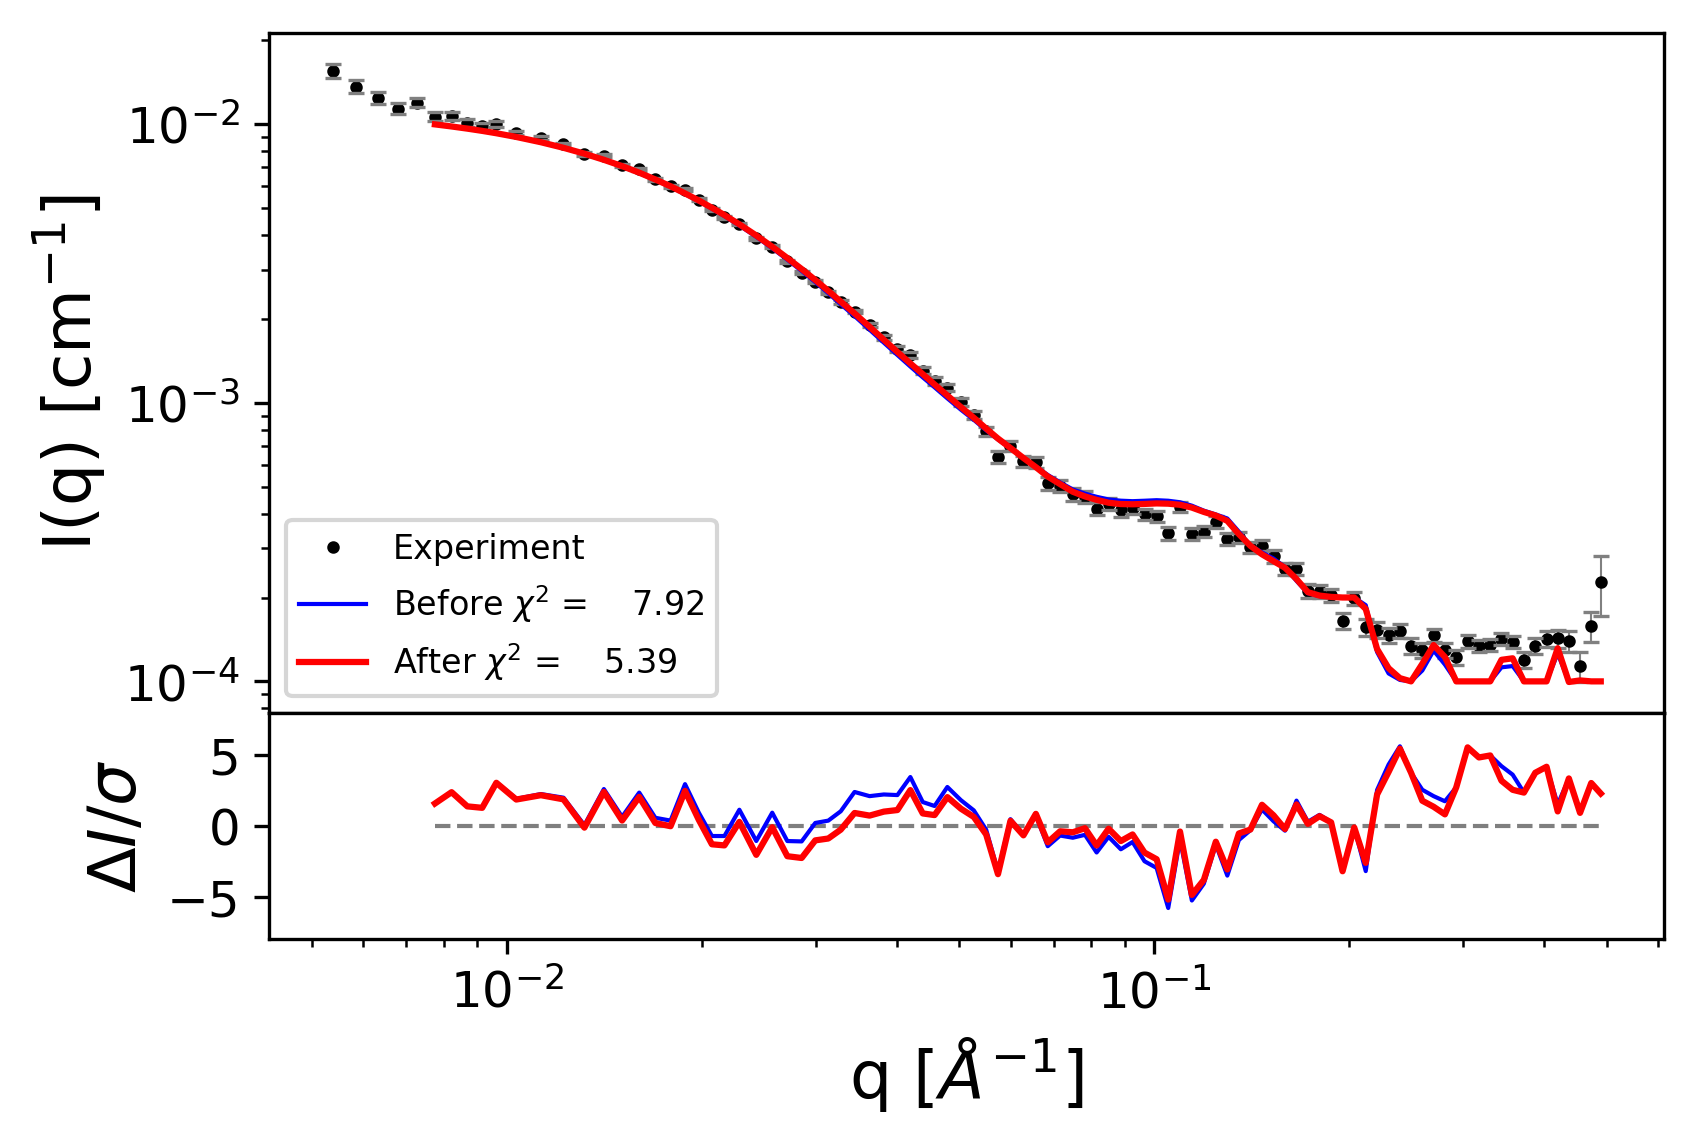

In [45]:
#Second part BME -- Rew. using selected theta and pltot comparative SAXS profiles. Using 4 bins 

# select theta=120
chi2_before,chi2_after, srel = rew.optimize(theta=120)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

##### Block averaging and plot figure

### Set bins for block average and optimal theta to use
n_frames = len(Rg)
n_bins =4
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=120
### split in 5 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/example2_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("example2_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

sts = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/example2_2_.stats.dat");
exp = np.loadtxt("/home/raul/projects/GHR_ensemble_fit/WIFBatch4/BME/GHR_NDSAXSbest_original.chi")

fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True,
                             gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0},figsize=(6, 4))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1,label="Experiment", c='black',markersize = 2)

ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=0.5, markeredgewidth=0.8, c='gray', lw=0.8, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Before $\chi^2$ ={:8.2f}".format(chi2_before),c='blue', linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="After $\chi^2$ ={:8.2f}".format(chi2_after),c='red',linewidth = 1.5, zorder = 5)


ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c='blue', linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c='red', linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)
#ax1.legend(loc = 1, prop={'size': 14})
#ax0.set_ylabel
#ax0.legend()
plt.show()



### Conclusions and issues to discuss

Both sets of parameters provide, in my view, reasonable fits. However, the second set, even though it has a "bump" round q = 0.1 and a underestimation of the background, provides a better fit even without the need to use the BME reweighting. Also the fit in the mid-q range is much better with this parameters. So, we need to really decide how are we going to chose which set of parameters to use and how are we going to justify our selection. 

If we compare the two parameters sets 

| Fig6      |                  |"Best"   | 
|----------------------------------------|           
| 1.486220  | AxisRatio        | 1.4     |
| 64.810100 | AreaPerHeadgroup | 65      |
| 25.8      | HeightOfBelt     | 25.8    |
| 122       | NumberOfLipids   | 120     |
| 2         | WaterAtHeads     | 5       |
| 0         | WaterAtBelt      | 0       |
| 5         | XRoughness       | 6.21378 |
| 1.065630  | CVBelt           | 1.02844 |
| 0.947621  | CVLipids         | 0.981301|
| 1.014700  | CVMP             | 1.06076 |
| 0.000120  | BackX            | 0.00012 |
| 1         | ScaleX           | 1.19804 |
| 5         | NRoughness       | 5       |
| 1         | CVWater          | 1       |
| 1         | ScaleConc        | 1       |

The main difference is in the values for XRoughness, the number of lipids and axis ratio. In both cases the background seems to be underestimated by the value of 0.000120. 


I will start today a fitting round using the "best parameters" but with zero background, as suggested by Lise, to estimate a good average value for the background that we can use to fix the underestimation we observe in the fits. 

Also, I think we need to be careful in the consideration of the "right" or "reasonable" value for the roughness to be used. 
